## 실루엣 분석의 이해

### 군집 평가 - 실루엣 분석

<img src=https://blog.kakaocdn.net/dn/tQkmF/btrEXkSUIt7/ZlSWkAlkf0kB8NmlSkkOYK/img.png width=1000><br>
<br>
- 실루엣 분석: 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지 나타내는 지표
- 실루엣 계수: 개별 데이터가 가지는 군집화 지표.
 -> 같은 군집(within-cluster), 다른 군집(between-cluster) 데이터들 과의 거리를 지표화한것

### 실루엣 계수

<img src=https://blog.kakaocdn.net/dn/S3HGE/btrEX2D94Ru/lReCvVc6beKR76aWS13K41/img.png width=1000><br>
<br>
- 정규화 하기위해 max(a(i), b(i))로 나누고, 대부분 b(i)가 max값이다
<br>

- 1에 가까울 수록 군집화가 잘된 것을 의미하며, 0인 경우 매우 랜덤해서 군집이 구분이 안될정도를 의미
<br>

- 심하면, 음수가 나올 수 있는데, 이는 군집 레이블이 잘못 정의되서 자신이 속한 군집보다, 다른 군집이 더 가까운 경우를 의미한다.

## 실루엣 분석 실습

### 사이킷런 실루엣 API

<img src=https://blog.kakaocdn.net/dn/bOiBj5/btrEXU7fAKH/EqRi8tLyvXqQfe7UL6kxw0/img.png width=1000><br>
- X: X feature 데이터 세트
- labels: 각 피처 데이터 세트에 대해 Clustering 결과 레이블
<br>

* **평균 실루엣 스코어가 좋다고 항상 군집화가 잘된것은 아니다.**<br>
 -> 잘 떨어져있는 군집이 있고, 잘 안떨어져 있는 군집이 있을 때. 잘 떨어져있는 군집이 너무 잘 떨어져있으면 실루엣 스코어가 높게 나올 수 있기 때문<br>
 >즉, 평균 실루엣 스코어와 더불어 **개별 군집의 평균값의 편차가 크지 않아야 한다.**

### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# 붓꽃 데이터 세트 피처들을 DataFrame 변환
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

# 개별 데이터에 대한 군집 결과를 cluster 컬럼으로 저장
irisDF['cluster'] = kmeans.labels_

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [3]:
print(f"irisDF.shape: {irisDF.shape}\n")
print(f"irisDF.cluster.value_counts()\n{irisDF.cluster.value_counts()}")

irisDF.shape: (150, 5)

irisDF.cluster.value_counts()
0    62
1    50
2    38
Name: cluster, dtype: int64


In [4]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

silhouette_samples( ) return 값의 shape (150,)


In [5]:
# silhouette_coeff 컬럼에는 개별 데이터에 대한 실루엣 계수
irisDF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [6]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
# 즉, 위 데이터프레임의 silhouette_coef의 평균
average_score = silhouette_score(iris.data, irisDF['cluster'])
print(f'붓꽃 데이터셋 Silhouette Analysis Score:{average_score:.3f}')
print(f"이 값은 모든 데이터 실루엣 평균과 같다 -> {irisDF.silhouette_coeff.mean():.3f}")

붓꽃 데이터셋 Silhouette Analysis Score:0.553
이 값은 모든 데이터 실루엣 평균과 같다 -> 0.553


In [7]:
## 그래프 스타일 설정
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white';plt.rcParams['axes.labelsize']= 17
plt.rcParams['axes.titlecolor']= 'white';plt.rcParams['axes.titlesize']= 20
plt.rcParams['figure.figsize'] = (10,6)

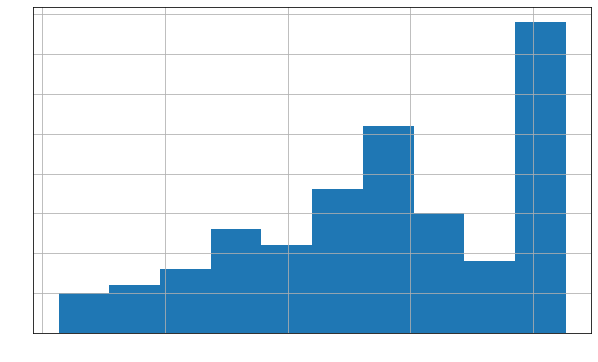

In [8]:
irisDF['silhouette_coeff'].hist()
plt.show()
## 실루엣 계수가 고르게 분포해야 좋은데, 0.8로 높은게 전체 평균을 높여준다.

In [9]:
# 클러스터별 실루엣 계수 평균
irisDF.groupby('cluster')['silhouette_coeff'].mean()
# 보면 1번 클러스터(세토사)가 군집화가 잘되있어서 전체 평균을 높히는 효과가 있다.
## 전체 실루엣 평균 수치만 보고는, 전체적으로 클러스터가 잘된거라고 보기 어렵다

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 클러스터별 평균 실루엣 계수의 시각화
: ->클러스터 개수 최적화 방법

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(5*n_cols, 5), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        # 데이터별 실루엣 계수 분포 확인
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        # 빨간색 점선으로 실루엣 계수 평균 수직 그래프
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [25]:
# 그래프 설정
plt.rcParams['axes.titlecolor']= 'white';plt.rcParams['axes.titlesize']= 13
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.labelsize']= 12

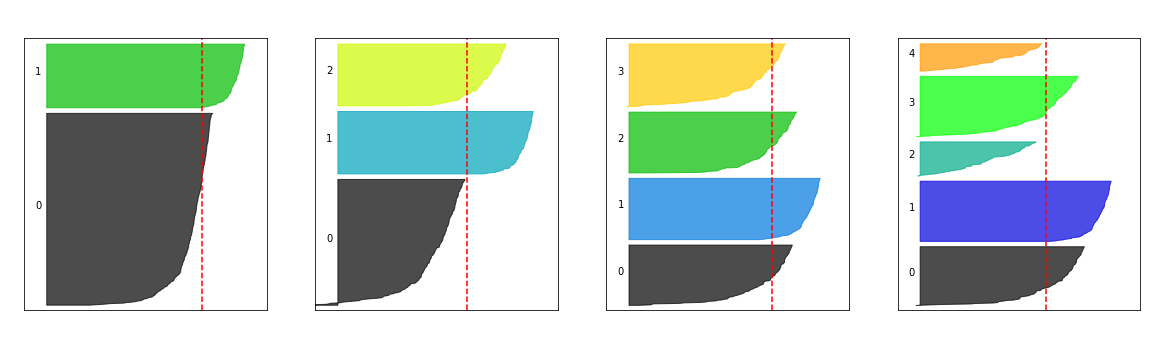

In [26]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)
## 클러스터 별로, 각 데이터의 실루엣 계수를 확인함과 동시에, 평균 실루엣 계수도 같이 볼 수 있다.

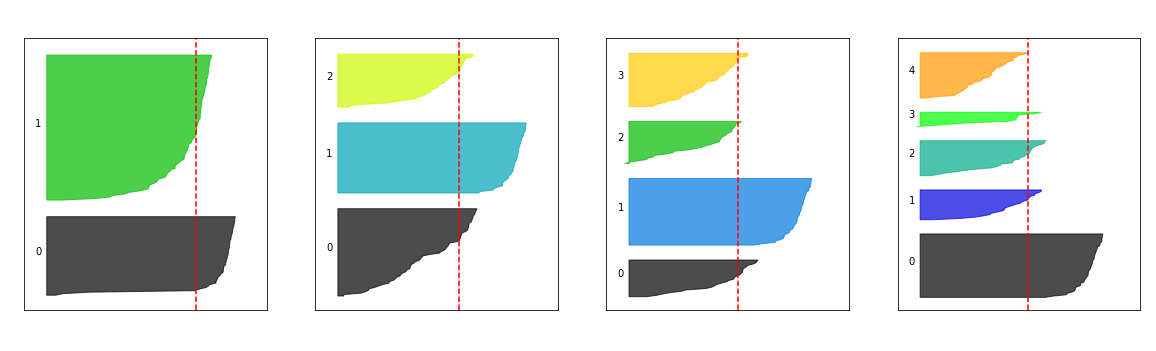

In [27]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

### 실루엣 계수와 scatter plot 동시 시각화

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


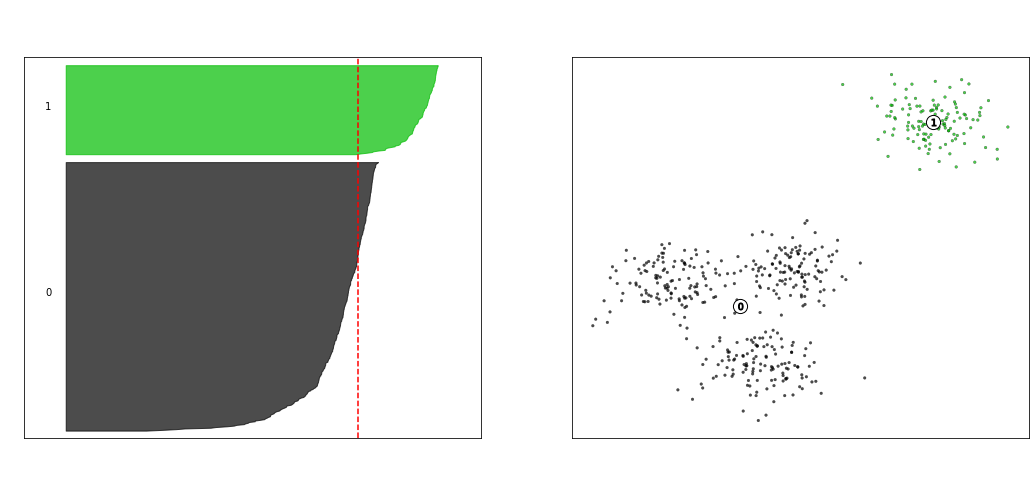

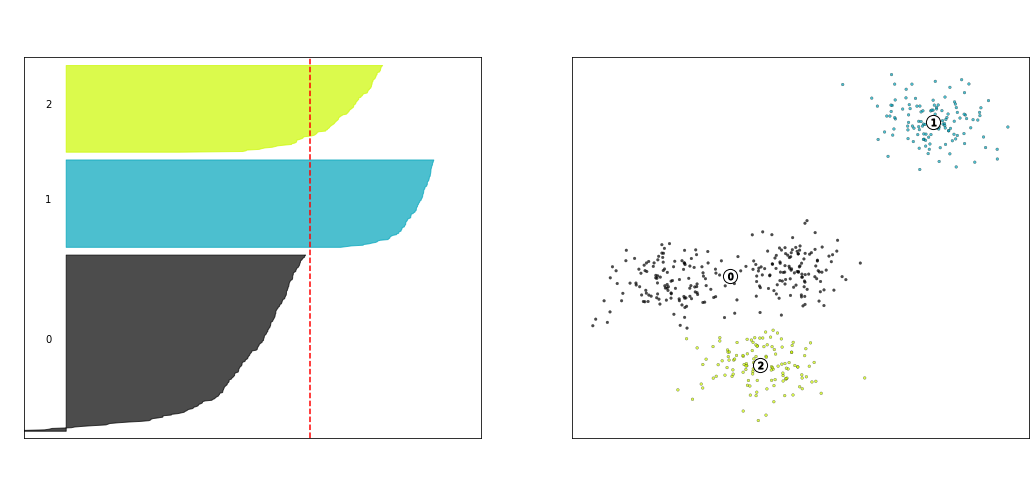

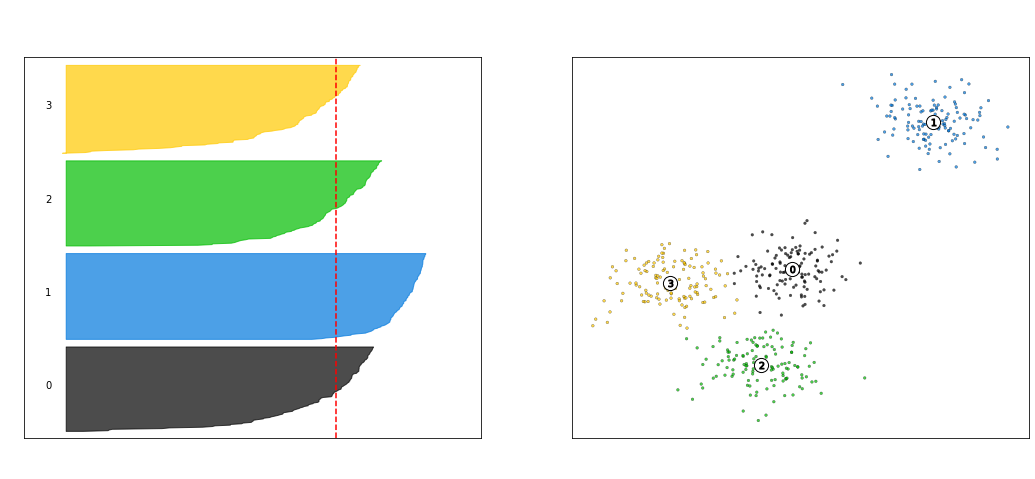

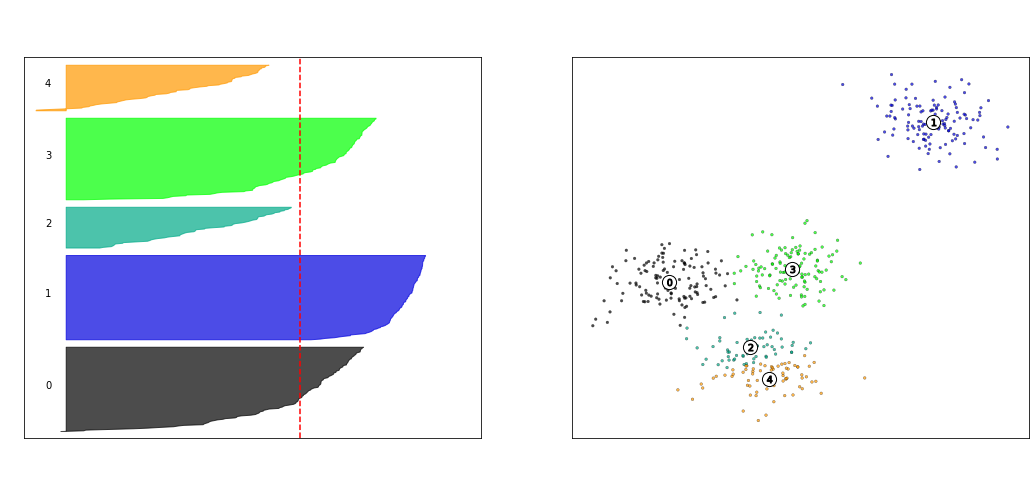

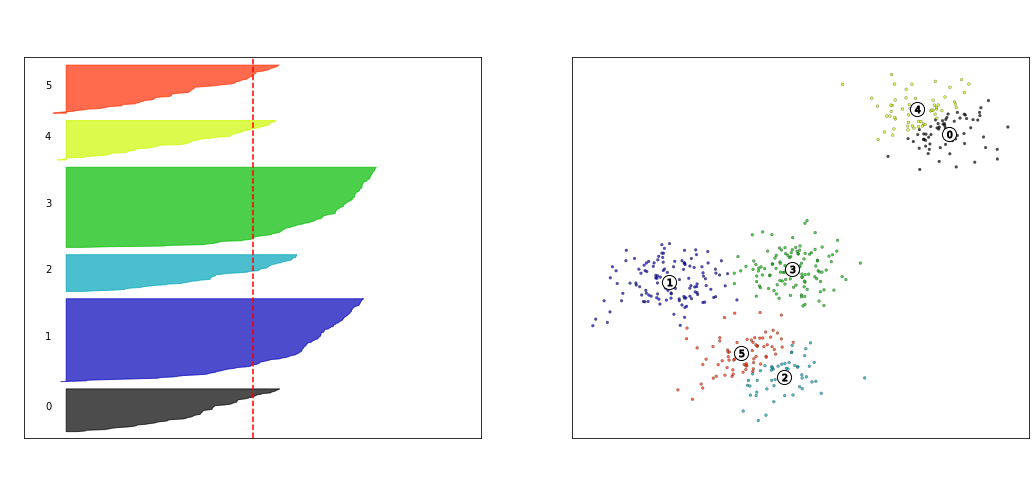

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        # 데이터별 실루엣 계수 영역 그래프 그리기
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed (Scatter)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0.3, alpha=0.7,
                c=colors, edgecolors='black')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolors='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=16, color='white')
plt.show()